# Assignment 4

9. In this exercise, we will predict the number of applications received
using the other variables in the College data set.

(a) Split the data set into a training set and a test set.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition  import PLSRegression

In [3]:
url = "https://www.statlearning.com/s/College.csv"
college = pd.read_csv(url)

In [4]:
college = college.set_index("Unnamed: 0")
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
X = college.drop('Apps', axis=1)
y = college['Apps']

# Encode the "Private" column with one-hot encoding
ct = make_column_transformer((OneHotEncoder(drop='first'), ['Private']), remainder='passthrough')
X = ct.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

(b) Fit a linear model using least squares on the training set, and
report the test error obtained.


In [33]:
#Fit linear regression
reg = LinearRegression()
reg.fit(X_train,y_train)
#Calculate mse
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
r_squared_linear = reg.score(X_test, y_test)

MSE: 997160.231072354


(c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [35]:
#Split dataset
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size = 0.2, random_state = 100)
#Fit ridge regression with alpha selected by cross validation
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
ridge_reg = Ridge(alpha = best_alpha)
ridge_reg.fit(X_train, y_train)
#Evaluate de model
y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")
r_squared_ridge = ridge_reg.score(X_test, y_test)

Test MSE: 999687.2725784183


(d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [36]:
#Fit Lasso regression with alpha selected by cross validation
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
lasso_reg = Lasso(alpha = best_alpha)
lasso_reg.fit(X_train, y_train)
#Evaluate model
y_pred = lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
r_squared_lasso = lasso_reg.score(X_test, y_test)

1014492.7399044434


In [22]:
#Print number of nonzero coefficients
coef_nonzero = sum(lasso_reg.coef_ != 0)
print( "Non zero coefficients:" + str(coef_nonzero))

Non zero coefficients:15


(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [37]:
#Create pipleine for PCA preprocessing
pipe = make_pipeline(StandardScaler(), PCA())
param_grid = {'pca__n_components': range(1, X_train.shape[1]+1)}
#Grid search for best parameter m
grid_search = GridSearchCV(pipe, param_grid = param_grid, cv = 5)
grid_search.fit(X_train)
#Selecting and printing best parameter
optimal_m = grid_search.best_params_['pca__n_components']
print("Optimal number of componets:", optimal_m)
#fitting PCA with best parameter
pipe = make_pipeline(StandardScaler(), PCA(n_components = optimal_m), LinearRegression() )
pipe.fit(X_train, y_train)
#Evaluating results
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test error (MSE):", mse)
r_squared_pca = pipe.score(X_test, y_test)

Optimal number of componets: 17
Test error (MSE): 997160.2310723484


(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [38]:
#Create pipeline and parameter grid
pipe = make_pipeline(StandardScaler(), PLSRegression())
param_grid = {'plsregression__n_components': range(1, X_train.shape[1]+1)}
#Grid search for best parameter m
grid_search = GridSearchCV(pipe, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)
#Selecting and printing best parameter
optimal_m = grid_search.best_params_['plsregression__n_components']
print('Optimal number of components:', optimal_m)
#Fitting a linear regression with best PLS parameter m
pipe = make_pipeline(StandardScaler(), PLSRegression(n_components = optimal_m))
pipe.fit(X_train, y_train)
#Evaluate model
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test error:", mse)
r_squared_pls = pipe.score(X_test, y_test)

Optimal number of components: 13
Test error: 1003795.5158703604


(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

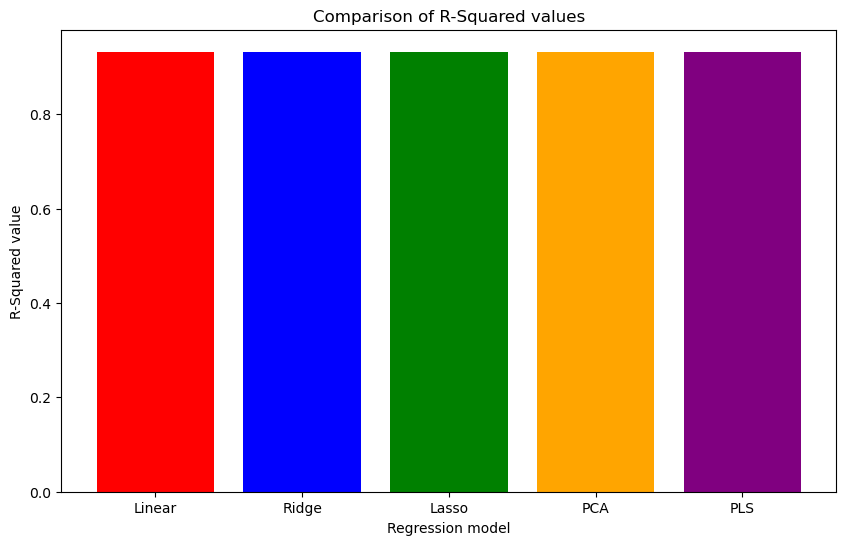

In [39]:
models = ['Linear', 'Ridge', 'Lasso', 'PCA', 'PLS']
r_squared_values = [r_squared_linear, r_squared_ridge, r_squared_lasso, r_squared_pca, r_squared_pls]
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize = (10,6))
plt.bar(models,r_squared_values, color = colors)
plt.title("Comparison of R-Squared values")
plt.xlabel('Regression model')
plt.ylabel('R-Squared value')
plt.show()

It looks like que can predict accurately with almost every model